In [73]:
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, Dropout, Flatten, GlobalMaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16

In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
train = ImageDataGenerator(rescale=1/255.0)
validation = ImageDataGenerator(rescale=1/255.0)

train_ds = train.flow_from_directory(
    '/content/drive/MyDrive/output_folder/train',
    color_mode='rgb',
    batch_size=32,
    target_size=(224,224),
    shuffle=True,
    seed=1
)

val_ds = validation.flow_from_directory(
    '/content/drive/MyDrive/output_folder/val',
    color_mode='rgb',
    batch_size=32,
    target_size=(224,224),
    shuffle=True,
    seed=1
)

Found 324 images belonging to 4 classes.
Found 39 images belonging to 4 classes.


In [76]:
feature_extractor = VGG16(weights='imagenet', input_shape=(224,224,3), include_top=False)

In [77]:
feature_extractor.trainable = False

In [89]:
input_ = Input(shape=(224,224,3))
x = feature_extractor(input_, training=False)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.2)(x)
output_ = Dense(4, activation='softmax')(x)
model = Model(input_, output_)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [90]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 25088)             0         
                                                                 
 dropout_7 (Dropout)         (None, 25088)             0         
                                                                 
 dense_10 (Dense)            (None, 32)                802848    
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 4)                 132 

In [91]:
model_fit = model.fit(train_ds, epochs=50, validation_data=val_ds)

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/50
11/11 [==============================] - 8s 614ms/step - loss: 1.3871 - accuracy: 0.5123 - val_loss: 0.6035 - val_accuracy: 0.7436
Epoch 2/50
11/11 [==============================] - 7s 627ms/step - loss: 0.4917 - accuracy: 0.8025 - val_loss: 0.2540 - val_accuracy: 0.9744
Epoch 3/50
11/11 [==============================] - 6s 515ms/step - loss: 0.2892 - accuracy: 0.9043 - val_loss: 0.1774 - val_accuracy: 0.9487
Epoch 4/50
11/11 [==============================] - 7s 637ms/step - loss: 0.1972 - accuracy: 0.9383 - val_loss: 0.2123 - val_accuracy: 0.9487
Epoch 5/50
11/11 [==============================] - 6s 512ms/step - loss: 0.1395 - accuracy: 0.9537 - val_loss: 0.0984 - val_accuracy: 0.9744
Epoch 6/50
11/11 [==============================] - 6s 549ms/step - loss: 0.1043 - accuracy: 0.9753 - val_loss: 0.1094 - val_accuracy: 0.9487
Epoch 7/50
11/11 [==============================] - 6s 509ms/step - loss: 0.0663 - accuracy: 0.9846 - val_loss: 0.1095 - val_accuracy: 0.9744
Epoch 

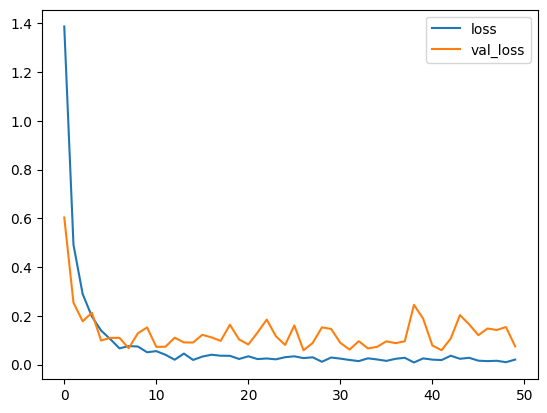

In [92]:
plt.plot(model_fit.history['loss'], label='loss')
plt.plot(model_fit.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

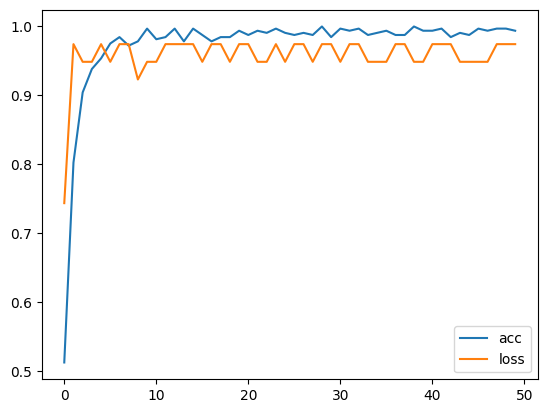

In [93]:
plt.plot(model_fit.history['accuracy'], label='acc')
plt.plot(model_fit.history['val_accuracy'], label='loss')
plt.legend()
plt.show()

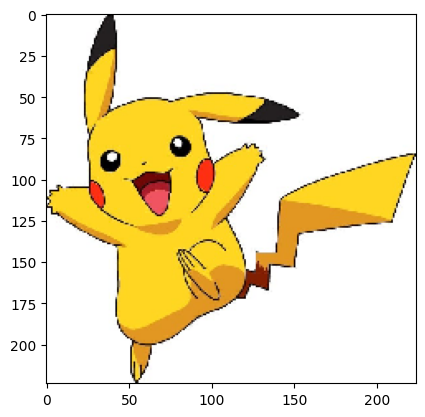

In [94]:
test_image = image.load_img('/content/drive/MyDrive/output_folder/test/pikachu/Pikachu2.jpg', target_size=(224,224))
plt.imshow(test_image)
plt.show()

In [95]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
prediction = model.predict(test_image).argmax(1)
prediction

1/1 [==============================] - 0s 139ms/step


array([2])

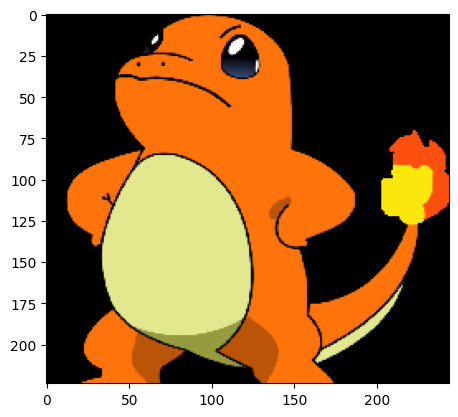

1/1 [==============================] - 0s 142ms/step
predict:  charmander
true:  charmander


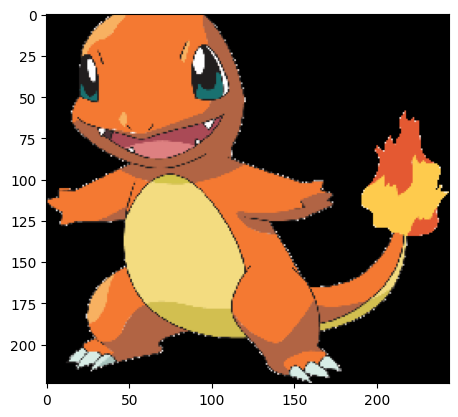

1/1 [==============================] - 0s 20ms/step
predict:  charmander
true:  charmander


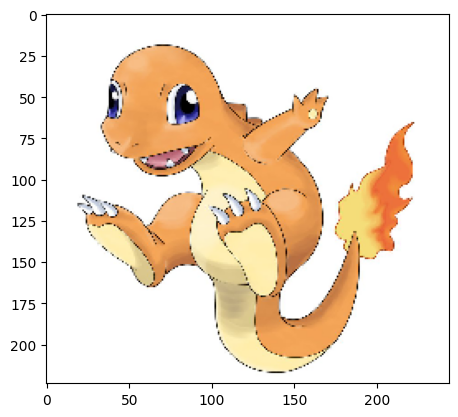

1/1 [==============================] - 0s 24ms/step
predict:  charmander
true:  charmander


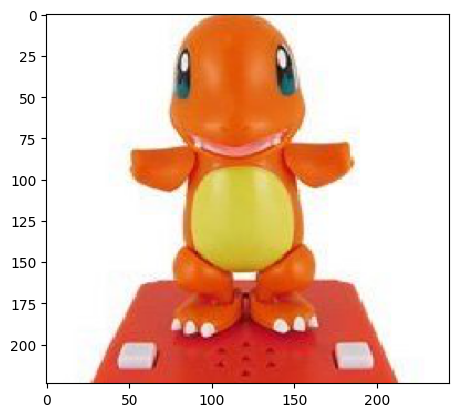

1/1 [==============================] - 0s 20ms/step
predict:  charmander
true:  charmander


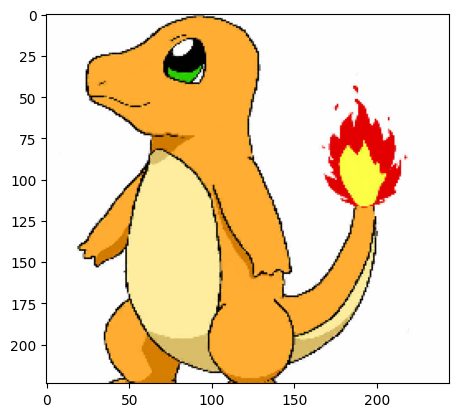

1/1 [==============================] - 0s 19ms/step
predict:  charmander
true:  charmander


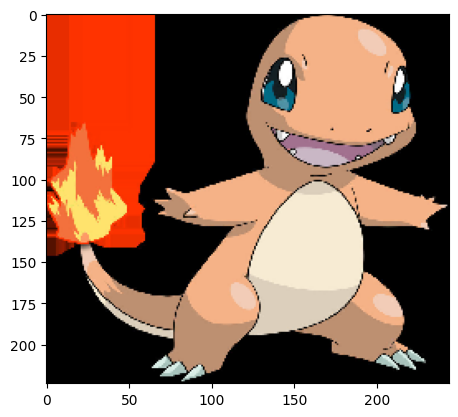

1/1 [==============================] - 0s 19ms/step
predict:  charmander
true:  charmander


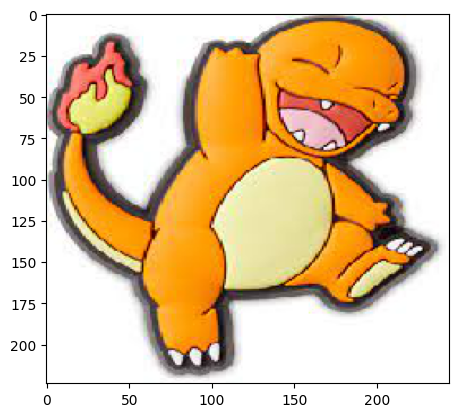

1/1 [==============================] - 0s 18ms/step
predict:  charmander
true:  charmander


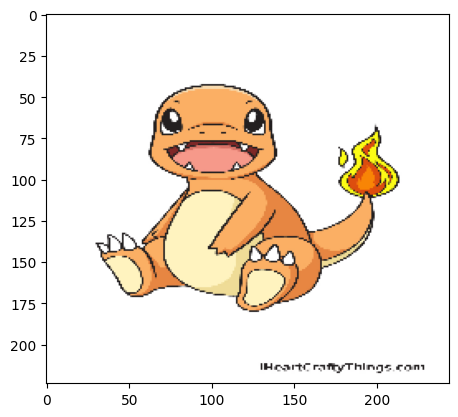

1/1 [==============================] - 0s 21ms/step
predict:  charmander
true:  charmander


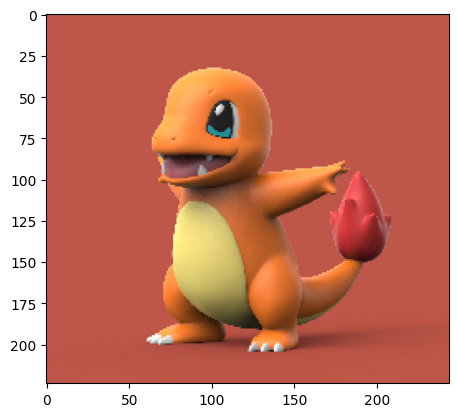

1/1 [==============================] - 0s 23ms/step
predict:  charmander
true:  charmander


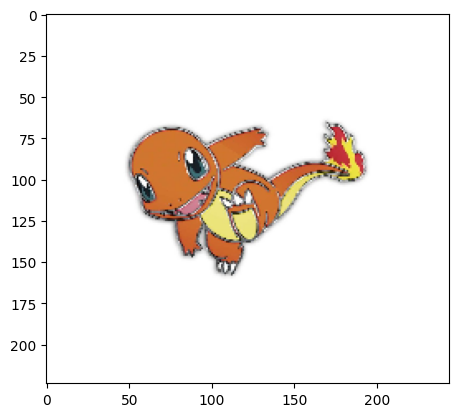

1/1 [==============================] - 0s 20ms/step
predict:  charmander
true:  charmander


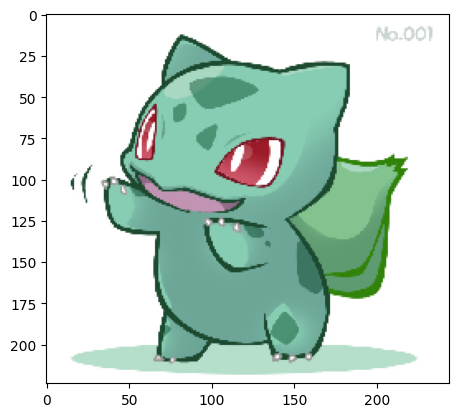

1/1 [==============================] - 0s 24ms/step
predict:  bulbasaur
true:  bulbasaur


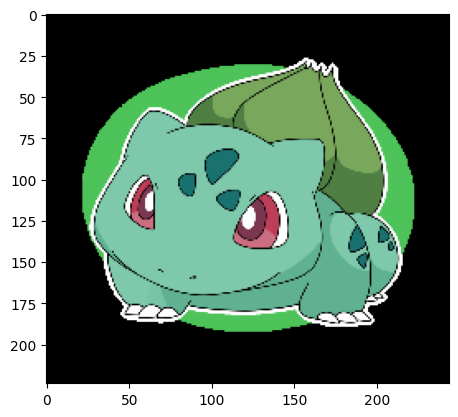

1/1 [==============================] - 0s 30ms/step
predict:  bulbasaur
true:  bulbasaur


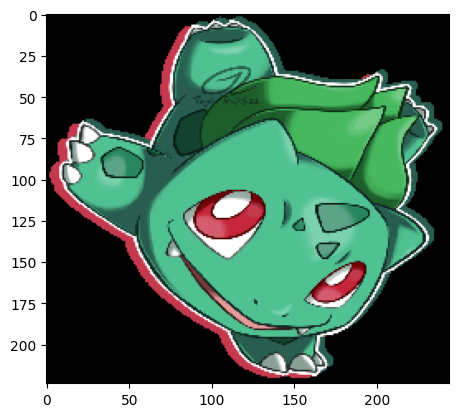

1/1 [==============================] - 0s 30ms/step
predict:  bulbasaur
true:  bulbasaur


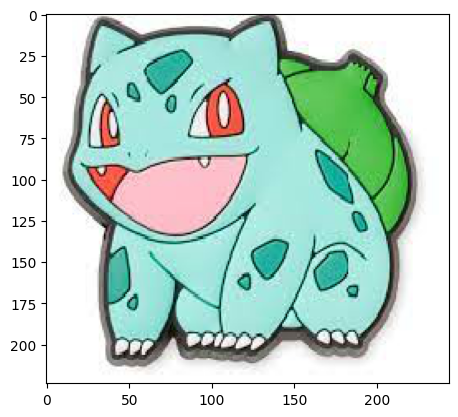

1/1 [==============================] - 0s 27ms/step
predict:  bulbasaur
true:  bulbasaur


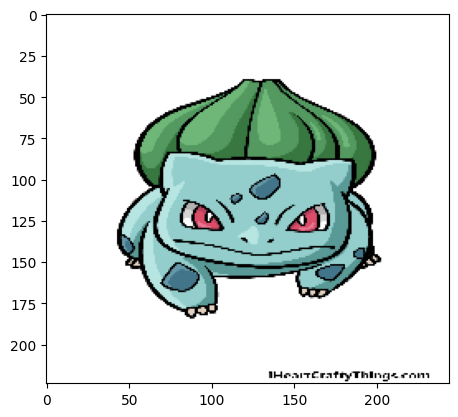

1/1 [==============================] - 0s 30ms/step
predict:  bulbasaur
true:  bulbasaur


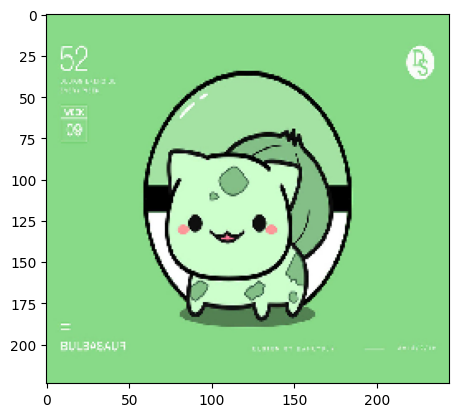

1/1 [==============================] - 0s 26ms/step
predict:  squirtle
true:  bulbasaur


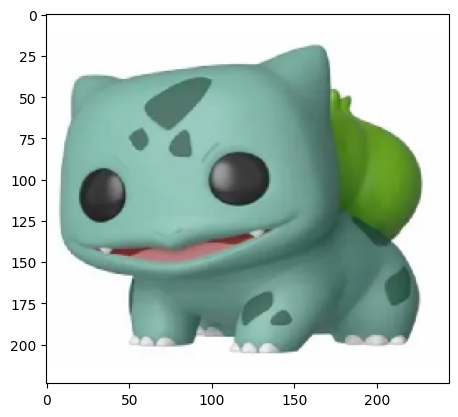

1/1 [==============================] - 0s 38ms/step
predict:  bulbasaur
true:  bulbasaur


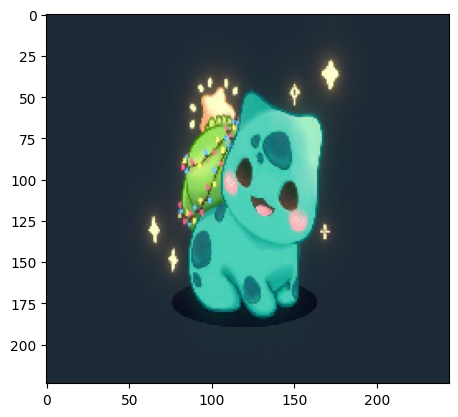

1/1 [==============================] - 0s 40ms/step
predict:  pikachu
true:  bulbasaur


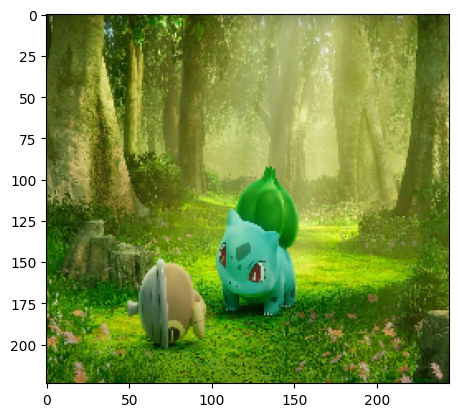

1/1 [==============================] - 0s 26ms/step
predict:  bulbasaur
true:  bulbasaur


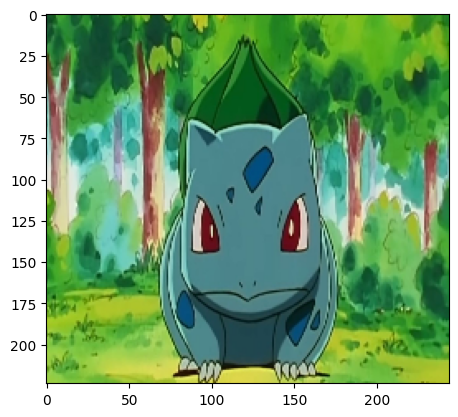

1/1 [==============================] - 0s 35ms/step
predict:  bulbasaur
true:  bulbasaur


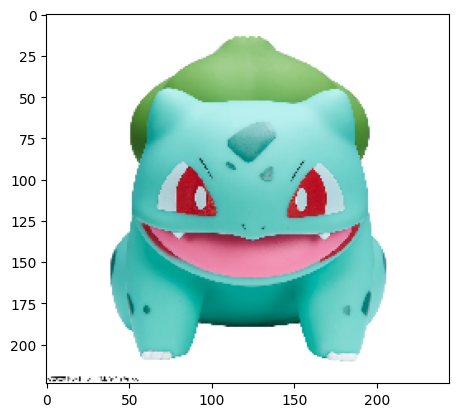

1/1 [==============================] - 0s 35ms/step
predict:  bulbasaur
true:  bulbasaur


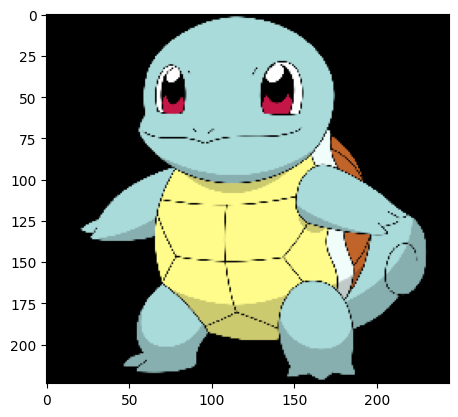

1/1 [==============================] - 0s 31ms/step
predict:  squirtle
true:  squirtle


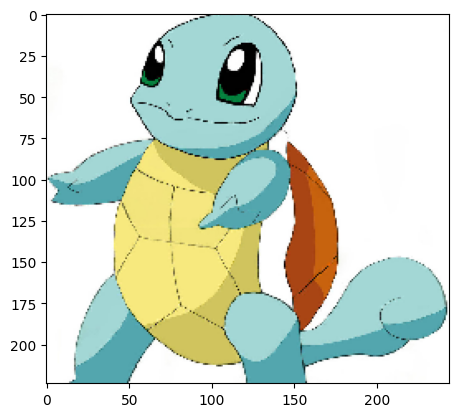

1/1 [==============================] - 0s 30ms/step
predict:  squirtle
true:  squirtle


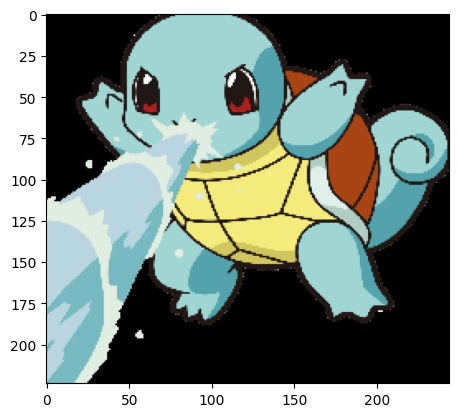

1/1 [==============================] - 0s 25ms/step
predict:  squirtle
true:  squirtle


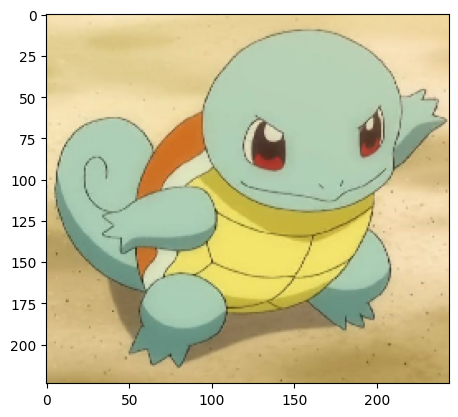

1/1 [==============================] - 0s 29ms/step
predict:  squirtle
true:  squirtle


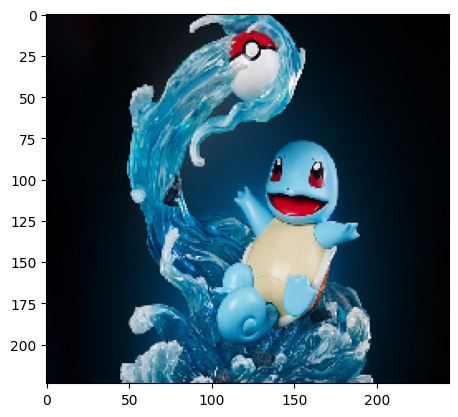

1/1 [==============================] - 0s 26ms/step
predict:  charmander
true:  squirtle


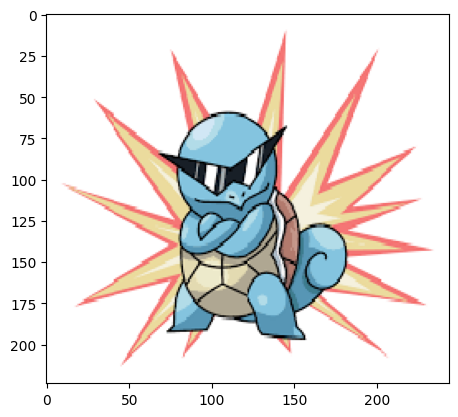

1/1 [==============================] - 0s 33ms/step
predict:  pikachu
true:  squirtle


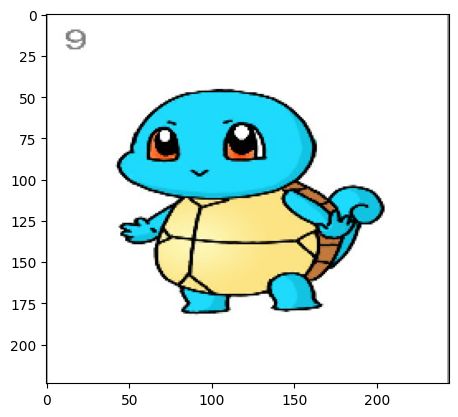

1/1 [==============================] - 0s 27ms/step
predict:  squirtle
true:  squirtle


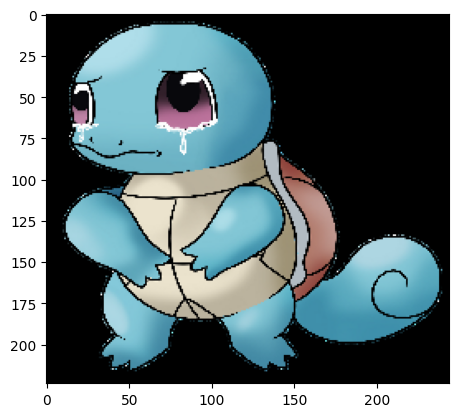

1/1 [==============================] - 0s 30ms/step
predict:  squirtle
true:  squirtle


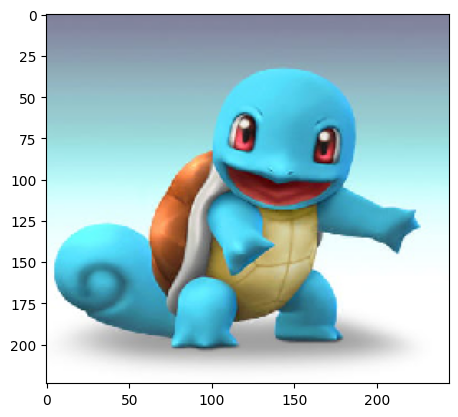

1/1 [==============================] - 0s 37ms/step
predict:  squirtle
true:  squirtle


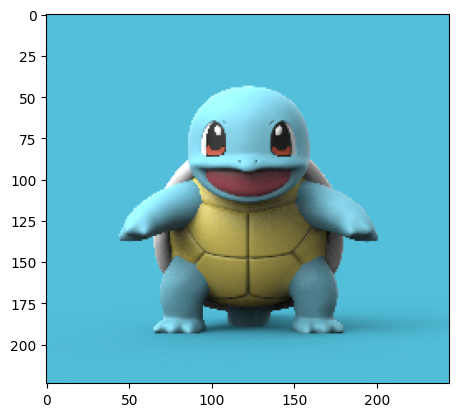

1/1 [==============================] - 0s 29ms/step
predict:  squirtle
true:  squirtle


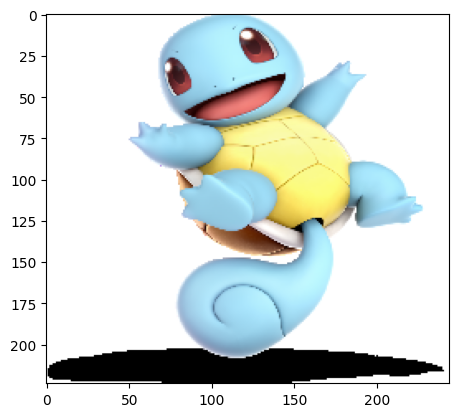

1/1 [==============================] - 0s 26ms/step
predict:  squirtle
true:  squirtle


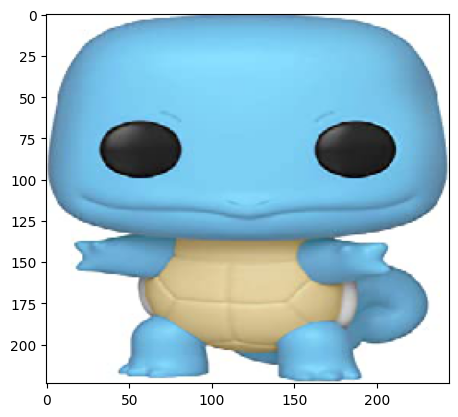

1/1 [==============================] - 0s 25ms/step
predict:  squirtle
true:  squirtle


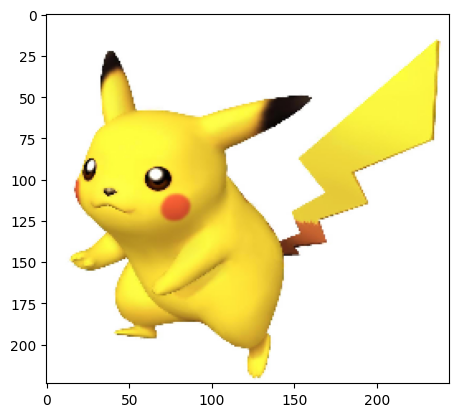

1/1 [==============================] - 0s 31ms/step
predict:  pikachu
true:  pikachu


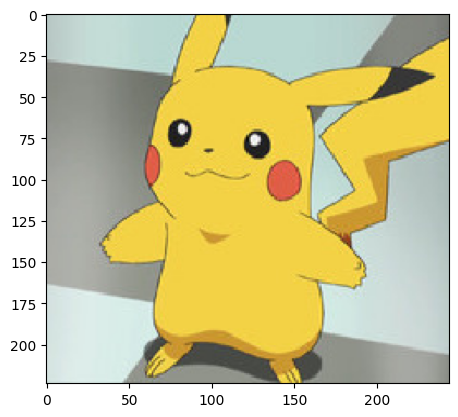

1/1 [==============================] - 0s 27ms/step
predict:  pikachu
true:  pikachu


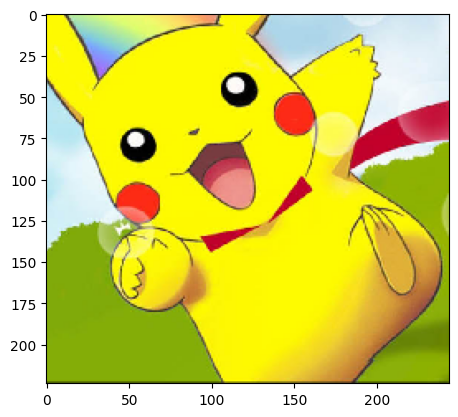

1/1 [==============================] - 0s 25ms/step
predict:  pikachu
true:  pikachu


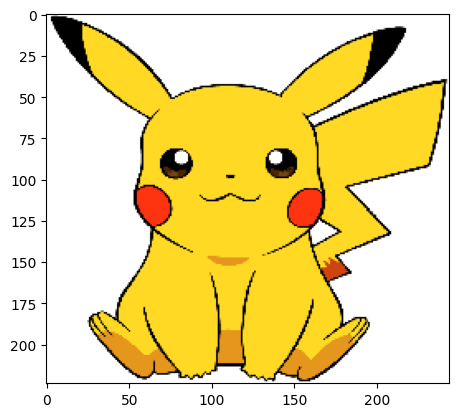

1/1 [==============================] - 0s 25ms/step
predict:  pikachu
true:  pikachu


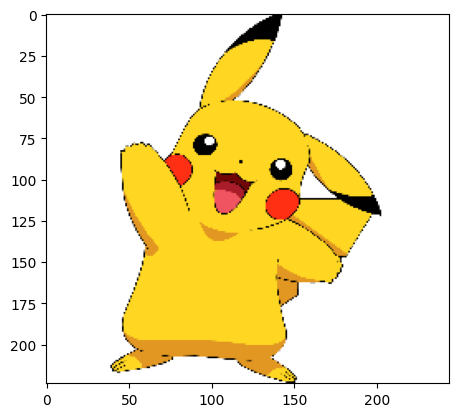

1/1 [==============================] - 0s 26ms/step
predict:  pikachu
true:  pikachu


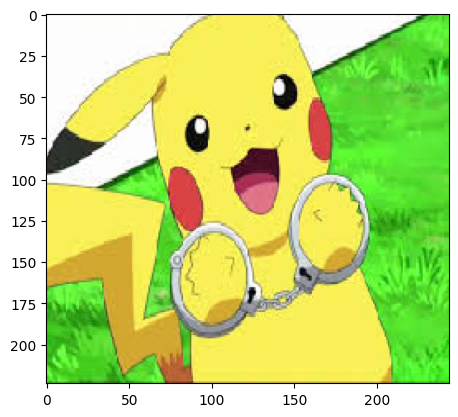

1/1 [==============================] - 0s 26ms/step
predict:  pikachu
true:  pikachu


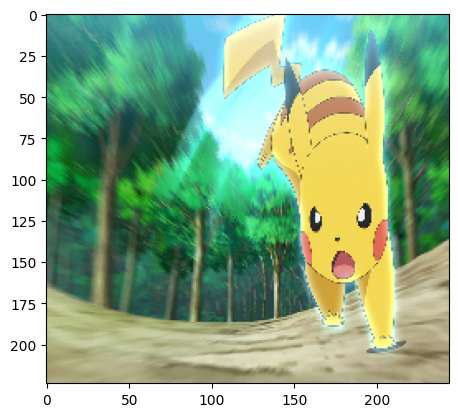

1/1 [==============================] - 0s 28ms/step
predict:  pikachu
true:  pikachu


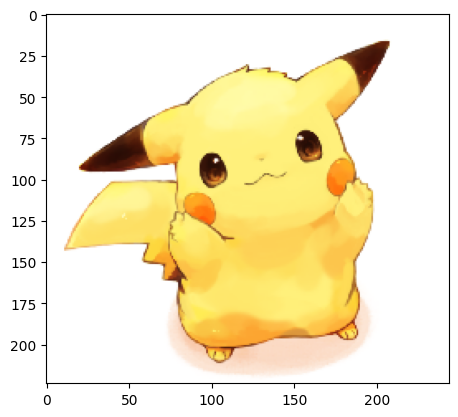

1/1 [==============================] - 0s 29ms/step
predict:  pikachu
true:  pikachu


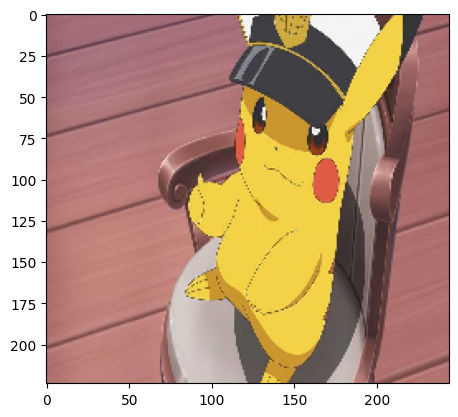

1/1 [==============================] - 0s 26ms/step
predict:  pikachu
true:  pikachu


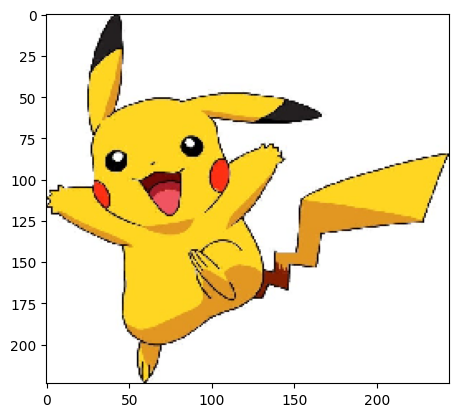

1/1 [==============================] - 0s 25ms/step
predict:  pikachu
true:  pikachu


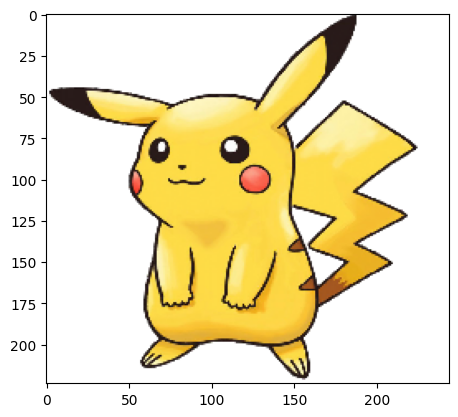

1/1 [==============================] - 0s 25ms/step
predict:  pikachu
true:  pikachu


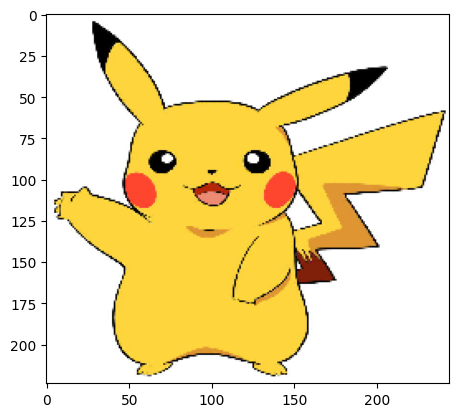

1/1 [==============================] - 0s 28ms/step
predict:  pikachu
true:  pikachu


In [96]:
import os
dir_path = '/content/drive/MyDrive/output_folder/test'
true_list = []
prediction_list = []
for i in os.listdir(dir_path):
  for starter in os.listdir(dir_path + '/' + i):
    img = image.load_img(dir_path + '/' + i + '/' + starter, target_size=(224,244))
    plt.imshow(img)
    plt.show()
    true_list.append(i)

    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    predictions = model.predict(X).argmax(1)
    prediction_list.append(predictions)
    if predictions == 0:
      pokemon = 'bulbasaur'
    if predictions == 1:
      pokemon = 'charmander'
    if predictions == 2:
      pokemon = 'pikachu'
    if predictions == 3:
      pokemon = 'squirtle'
    print('predict: ', pokemon)
    print('true: ', i)

  for i in range(len(true_list)):
    if true_list[i] == 'squirtle':
      true_list[i] = 3
    if true_list[i] == 'bulbasaur':
      true_list[i] = 0
    if true_list[i] == 'charmander':
      true_list[i] = 1
    if true_list[i] == 'pikachu':
      true_list[i] = 2


In [86]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('normalized confusion matrix')
  else:
    print('confusion matrix without normalization')
  print(cm)
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j], fmt), horizontalalignment='center', color='white' if cm[i,j]>thresh else 'black')
  plt.tight_layout()
  plt.ylabel('true label')
  plt.xlabel('predicted label')
  plt.show()

confusion matrix without normalization
[[ 9  0  1  1]
 [ 0 10  0  0]
 [ 0  0 12  0]
 [ 0  1  1 10]]


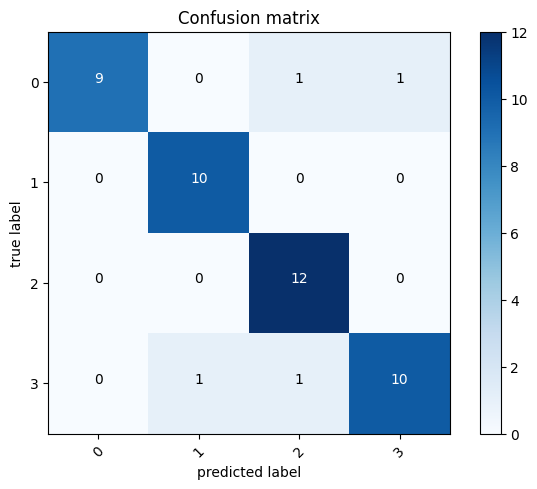

In [97]:
cm = confusion_matrix(true_list, prediction_list)
plot_confusion_matrix(cm, list(range(4)))


In [98]:
from sklearn.metrics import accuracy_score
score = accuracy_score(true_list, prediction_list)
score

0.9111111111111111